In [1]:
%load_ext watermark

In [2]:
%watermark -a Schmelling,Nicolas -u -d -v -p matplotlib,numpy,pandas,scipy

Schmelling,Nicolas 
Last updated: 17/09/2015 

CPython 2.7.9
IPython 3.0.0

matplotlib 1.4.3
numpy 1.9.2
pandas 0.15.2
scipy 0.15.1


---
Any comments and suggestions or questions?     
Please feel free to contact me via [twitter](https://twitter.com/bio_mediocre) or [email](mailto:schmelli@msu.edu).

---

#Length distribution of KaiA, KaiB, KaiC#
---

In the previous [IPython notebook](1_KaiABC_BLAST_DataCollectionProcessing.ipynb) we collected all sorts of data about BLAST results and metrics, and additional information about the organism and protein itself. In the following the  sequence distribution for all hits of KaiA, KaiB, and KaiC are compared.

---

<a id='Content'></a>
-----

#Content#
---

| [Preprocessing](#code) | [Scatterplots](#scatter) |

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.stats as s
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<a id='code'></a>
-----

###Preprocessing###
---

In [2]:
pd.set_option('mode.chained_assignment',None)

In [3]:
def categories_taxonomy(df):
    
    count = 0
    
    for i in list(df.taxonomy):
        if 'cyanobacteria' in str(i).lower():
            df.taxonomy[count] = 1
            count += 1
        elif 'proteobacteria' in str(i).lower():
            df.taxonomy[count] = 2
            count += 1
        elif 'archaea' in str(i).lower():
            df.taxonomy[count] = 3
            count += 1
        else:
            df.taxonomy[count] = 4
            count += 1
    
    return df

In [4]:
kaiA = pd.read_csv('1._BLAST/Synechococcus/kaiA_all.csv')
kaiA = categories_taxonomy(kaiA)
kaiA = kaiA[['query_name','taxonomy','kaiA_length','seq']]
kaiA.columns = ['query_name', 'taxonomy','kaiA_length','kaiA_seq']

kaiB = pd.read_csv('1._BLAST/Synechococcus/kaiB_all.csv')
kaiB = categories_taxonomy(kaiB)
kaiB = kaiB[['query_name','taxonomy','kaiB_length','seq']]
kaiB.columns = ['query_name', 'taxonomy','kaiB_length','kaiB_seq']

kaiC = pd.read_csv('1._BLAST/Synechococcus/kaiC_all.csv')
kaiC = categories_taxonomy(kaiC)
kaiC = kaiC[['query_name','taxonomy','kaiC_length','seq']]
kaiC.columns = ['query_name', 'taxonomy','kaiC_length','kaiC_seq']

In [5]:
KaiABC = pd.merge(kaiA, kaiB, how='outer')
KaiABC = pd.merge(KaiABC, kaiC, how='outer')
    
KaiABC = KaiABC.drop_duplicates()
KaiABC = KaiABC[KaiABC.kaiC_length.notnull()]

In [6]:
ABC = KaiABC.fillna(0)
ABC.head()

,query_name,taxonomy,kaiA_length,kaiA_seq,kaiB_length,kaiB_seq,kaiC_length,kaiC_seq
0,Synechococcus elongatus PCC 7942,1,284,MLSQIAICIWVESTAILQDCQRALSADRYQLQVCESGEMLLEYAQT...,102,MSPRKTYILKLYVAGNTPNSVRALKTLKNILEVEFQGVYALKVIDV...,519,MTSAEMTSPNNNSEHQAIAKMRTMIEGFDDISHGGLPIGRSTLVSG...
1,Synechococcus sp. UTEX 2973,1,284,MLSQIAICIWVESTAILQDCQRALSADRYQLQVCESGEMLLEYAQT...,102,MSPRKTYILKLYVAGNTPNSVRALKTLKNILEVEFQGVYALKVIDV...,519,MTSAEMTSPNNNSEHQAIAKMRTMIEGFDDISHGGLPIGRSTLVSG...
2,Synechococcus elongatus PCC 6301,1,284,MLSQIAICIWVESTAILQDCQRALSADRYQLQVCESGEMLLEYAQT...,102,MSPRKTYILKLYVAGNTPNSVRALKTLKNILEVEFQGVYALKVIDV...,519,MTSAEMTSPNNNSEHQAIAKMRTMIEGFDDISHGGLPIGRSTLVSG...
3,Lyngbya aestuarii BL J,1,322,MLVKETGSLSDSLAGNLTSTHAAVWRPHLSICVFVPSESIADSVMS...,104,MSPLKKTYVLKLYVAGNTPNSVRALKTLKEILEQEFQGVYALKVID...,521,MSESSQNAKTNGRKLIGVQKIRTMVEGFDDISHGGMPLGRTTLVSG...
4,Lyngbya aestuarii BL J,1,322,MLVKETGSLSDSLAGNLTSTHAAVWRPHLSICVFVPSESIADSVMS...,104,MSPLKKTYVLKLYVAGNTPNSVRALKTLKEILEQEFQGVYALKVID...,522,MEFLVRGAVQYNEPGVFIAFEETAEELTENVASLGWDLKQLTAENK...


In [7]:
ABC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2283 entries, 0 to 2299
Data columns (total 8 columns):
query_name     2283 non-null object
taxonomy       2283 non-null int64
kaiA_length    2283 non-null float64
kaiA_seq       2283 non-null object
kaiB_length    2283 non-null float64
kaiB_seq       2283 non-null object
kaiC_length    2283 non-null float64
kaiC_seq       2283 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 160.5+ KB


[Back to Content](#Content)

<a id='scatter'></a>
-----

###Scatterplot###
---

__KaiA and KaiC__

---

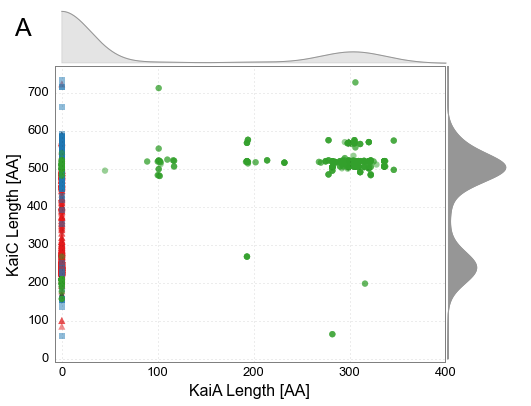

In [8]:
f = plt.figure(figsize=(7.5,5.77))
    
plots = gridspec.GridSpec(2,2,wspace=0.0,hspace=0.0,height_ratios=[0.5,2.5], width_ratios=[2.5,0.5])

def clean_axis(ax):
    """Remove ticks, tick labels, and frame from axis"""
    for sp in ax.spines.values():
        sp.set_visible(False)
        
hfont = {'fontname':'Arial'}
    
########
    
ax1 = f.add_subplot(plots[1,0])
    
# Remove the tick marks; they are unnecessary with the tick lines we just plotted.  
ax1.tick_params(axis="both", which="both", bottom="off", top="off",  
                labelbottom="on", left="off", right="off", labelleft="on")

ax1.scatter(ABC.kaiA_length[ABC.taxonomy == 4], ABC.kaiC_length[ABC.taxonomy == 4],
            color='k', edgecolor='', s=40, alpha=0.3, label='Other', marker='d')
ax1.scatter(ABC.kaiA_length[ABC.taxonomy == 3], ABC.kaiC_length[ABC.taxonomy == 3],
            color='#e31a1c', edgecolor='', s=50, alpha=0.5, label='Archaea', marker='^')
ax1.scatter(ABC.kaiA_length[ABC.taxonomy == 2], ABC.kaiC_length[ABC.taxonomy == 2],
            color='#1f78b4', edgecolor='', s=40, alpha=0.5, label='Proteobacteria', marker='s')
ax1.scatter(ABC.kaiA_length[ABC.taxonomy == 1], ABC.kaiC_length[ABC.taxonomy == 1],
            color='#33a02c', edgecolor='', s=40, alpha=0.5, label='Cyanobacteria', marker='o')


ax1.set_xticks(range(0, 401, 100))
ax1.set_xticklabels([str(x) for x in range(0, 401, 100)], fontsize=13, **hfont)

ax1.set_yticks(range(0, 701, 100))
ax1.set_yticklabels([str(x) for x in range(0, 701, 100)], fontsize=13, **hfont)

plt.ylabel('KaiC Length [AA]', fontsize=16, **hfont)
plt.xlabel('KaiA Length [AA]', fontsize=16, **hfont)
    
xlim(-10,400)
ylim(-10,800)
    
clean_axis(ax1)

for y in range(0, 701, 100):  
    plot(range(-7, 400), [y] * len(range(-7, 400)), ":", lw=0.5,
         color="black", alpha=0.3) 
    
for x in range(0, 301, 100):  
    plot([x] * len(range(-7, 800)), range(-7, 800), ":", lw=0.5,
         color="black", alpha=0.3)

plt.plot((-7, 400), (-7,-7), "-", lw=1, color="grey")
plt.plot((400,400), (-7,770), "-", lw=2, color="grey")
plt.plot((-7, 400), (770,770), "-", lw=1, color="grey")
plt.plot((-7,-7), (-7,770), "-", lw=1, color="grey")
    
########
    
ax2 = f.add_subplot(plots[1,1], sharey=ax1)
    
# Remove the tick marks; they are unnecessary with the tick lines we just plotted.  
ax2.tick_params(axis="both", which="both", bottom="off", top="off",  
                labelbottom="off", left="off", right="off", labelleft="off")

data = ABC.sort(['kaiC_length'])
data['kaiC_length']
    
density = s.gaussian_kde(data['kaiC_length'], bw_method=0.25)
x = linspace(0,800,10000)
    
ax2.plot(density(x), x, color='#969696', lw=1)
ax2.fill_betweenx(x, 1e-4, density(x), color='#969696', alpha=1)
    
ylim(-10,770)
xlim(-0.0002, 0.008)
    
clean_axis(ax2)
   
########

ax3 = f.add_subplot(plots[0,0], sharex=ax1)
    
# Remove the tick marks; they are unnecessary with the tick lines we just plotted.  
ax3.tick_params(axis="both", which="both", bottom="off", top="off",  
                labelbottom="off", left="off", right="off", labelleft="off")

data = ABC.sort(['kaiA_length'])
data['kaiA_length']
    
density = s.gaussian_kde(data['kaiA_length'], bw_method=0.25)
x = linspace(0,410,10000)
    
ax3.plot(x, density(x), color='#969696', lw=1)
ax3.fill_between(x, 1e-4, density(x), color='#969696', alpha=0.25)
        
xlim(-10,400)
ylim(-0.0005, 0.011)

#plt.title('KaiA-dependent KaiB Length Distribution', fontsize=20, **hfont)
ax1.text(-50,850, 'A', fontsize=25, **hfont)

clean_axis(ax3)
    
########

f.tight_layout()

#plt.savefig('%s.png' %'Test1_Final_dist_KaiAC', format='png',dpi=600)
plt.show()

[Back to Content](#Content)

---

__KaiB and KaiC__

---

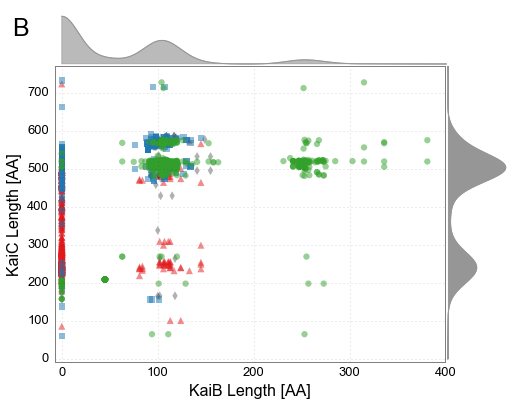

In [9]:
f = plt.figure(figsize=(7.5,5.77))
    
plots = gridspec.GridSpec(2,2,wspace=0.0,hspace=0.0,height_ratios=[0.5,2.5], width_ratios=[2.5,0.5])

def clean_axis(ax):
    """Remove ticks, tick labels, and frame from axis"""
    for sp in ax.spines.values():
        sp.set_visible(False)
        
hfont = {'fontname':'Arial'}
    
########
    
ax1 = f.add_subplot(plots[1,0])
    
# Remove the tick marks; they are unnecessary with the tick lines we just plotted.  
ax1.tick_params(axis="both", which="both", bottom="off", top="off",  
                labelbottom="on", left="off", right="off", labelleft="on")

ax1.scatter(ABC.kaiB_length[ABC.taxonomy == 4], ABC.kaiC_length[ABC.taxonomy == 4],
            color='k', edgecolor='', s=40, alpha=0.3, label='Other', marker='d')
ax1.scatter(ABC.kaiB_length[ABC.taxonomy == 3], ABC.kaiC_length[ABC.taxonomy == 3],
            color='#e31a1c', edgecolor='', s=50, alpha=0.5, label='Archaea', marker='^')
ax1.scatter(ABC.kaiB_length[ABC.taxonomy == 2], ABC.kaiC_length[ABC.taxonomy == 2],
            color='#1f78b4', edgecolor='', s=40, alpha=0.5, label='Proteobacteria', marker='s')
ax1.scatter(ABC.kaiB_length[ABC.taxonomy == 1], ABC.kaiC_length[ABC.taxonomy == 1],
            color='#33a02c', edgecolor='', s=40, alpha=0.5, label='Cyanobacteria', marker='o')

ax1.set_xticks(range(0, 401, 100))
ax1.set_xticklabels([str(x) for x in range(0, 401, 100)], fontsize=13, **hfont)

ax1.set_yticks(range(0, 701, 100))
ax1.set_yticklabels([str(x) for x in range(0, 701, 100)], fontsize=13, **hfont)

plt.ylabel('KaiC Length [AA]', fontsize=16, **hfont)
plt.xlabel('KaiB Length [AA]', fontsize=16, **hfont)
    
xlim(-10,400)
ylim(-10,800)
    
clean_axis(ax1)

for y in range(0, 701, 100):  
    plot(range(-7, 400), [y] * len(range(-7, 400)), ":", lw=0.5,
         color="black", alpha=0.3) 
    
for x in range(0, 301, 100):  
    plot([x] * len(range(-7, 800)), range(-7, 800), ":", lw=0.5,
         color="black", alpha=0.3)

plt.plot((-7, 400), (-7,-7), "-", lw=1, color="grey")
plt.plot((400,400), (-7,770), "-", lw=2, color="grey")
plt.plot((-7, 400), (770,770), "-", lw=1, color="grey")
plt.plot((-7,-7), (-7,770), "-", lw=1, color="grey")
    
########
    
ax2 = f.add_subplot(plots[1,1], sharey=ax1)
    
# Remove the tick marks; they are unnecessary with the tick lines we just plotted.  
ax2.tick_params(axis="both", which="both", bottom="off", top="off",  
                labelbottom="off", left="off", right="off", labelleft="off")

data = ABC.sort(['kaiC_length'])
data['kaiC_length']
    
density = s.gaussian_kde(data['kaiC_length'], bw_method=0.25)
x = linspace(0,800,10000)
    
ax2.plot(density(x), x, color='#969696', lw=1)
ax2.fill_betweenx(x, 1e-4, density(x), color='#969696', alpha=1)
    
ylim(-10,770)
xlim(-0.0002, 0.008)
    
clean_axis(ax2)
   
########

ax3 = f.add_subplot(plots[0,0], sharex=ax1)
    
# Remove the tick marks; they are unnecessary with the tick lines we just plotted.  
ax3.tick_params(axis="both", which="both", bottom="off", top="off",  
                labelbottom="off", left="off", right="off", labelleft="off")

data = ABC.sort(['kaiB_length'])
data['kaiB_length']
    
density = s.gaussian_kde(data['kaiB_length'], bw_method=0.25)
x = linspace(0,410,10000)
    
ax3.plot(x, density(x), color='#969696', lw=1)
ax3.fill_between(x, 1e-4, density(x), color='#969696', alpha=0.65)
        
xlim(-10,400)
ylim(-0.0005, 0.015)

#plt.title('KaiA-dependent KaiB Length Distribution', fontsize=20, **hfont)
ax1.text(-50,850, 'B', fontsize=25, **hfont)

clean_axis(ax3)
    
########

f.tight_layout()

#plt.savefig('%s.png' %'Test1_Final_dist_KaiBC', format='png',dpi=600)
plt.show()

[Back to Content](#Content)

---

__KaiA and KaiB__

---

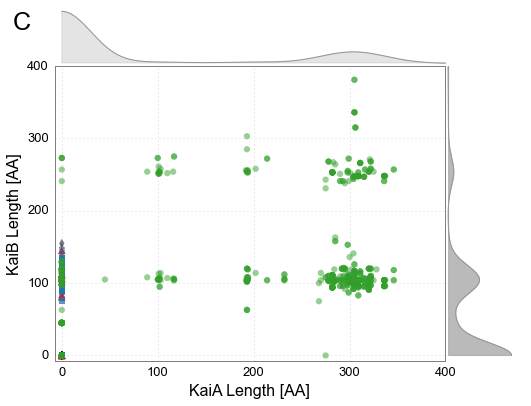

In [10]:
f = plt.figure(figsize=(7.5,5.77))
    
plots = gridspec.GridSpec(2,2,wspace=0.0,hspace=0.0,height_ratios=[0.5,2.5], width_ratios=[2.5,0.5])

def clean_axis(ax):
    """Remove ticks, tick labels, and frame from axis"""
    for sp in ax.spines.values():
        sp.set_visible(False)
        
hfont = {'fontname':'Arial'}
    
########
    
ax1 = f.add_subplot(plots[1,0])
    
# Remove the tick marks; they are unnecessary with the tick lines we just plotted.  
ax1.tick_params(axis="both", which="both", bottom="off", top="off",  
                labelbottom="on", left="off", right="off", labelleft="on")

ax1.scatter(ABC.kaiA_length[ABC.taxonomy == 4], ABC.kaiB_length[ABC.taxonomy == 4],
            color='k', edgecolor='', s=40, alpha=0.3, label='Other', marker='d')
ax1.scatter(ABC.kaiA_length[ABC.taxonomy == 3], ABC.kaiB_length[ABC.taxonomy == 3],
            color='#e31a1c', edgecolor='', s=50, alpha=0.5, label='Archaea', marker='^')
ax1.scatter(ABC.kaiA_length[ABC.taxonomy == 2], ABC.kaiB_length[ABC.taxonomy == 2],
            color='#1f78b4', edgecolor='', s=40, alpha=0.5, label='Proteobacteria', marker='s')
ax1.scatter(ABC.kaiA_length[ABC.taxonomy == 1], ABC.kaiB_length[ABC.taxonomy == 1],
            color='#33a02c', edgecolor='', s=40, alpha=0.5, label='Cyanobacteria', marker='o')


ax1.set_xticks(range(0, 401, 100))
ax1.set_xticklabels([str(x) for x in range(0, 401, 100)], fontsize=13, **hfont)

ax1.set_yticks(range(0, 401, 100))
ax1.set_yticklabels([str(x) for x in range(0, 401, 100)], fontsize=13, **hfont)

plt.ylabel('KaiB Length [AA]', fontsize=16, **hfont)
plt.xlabel('KaiA Length [AA]', fontsize=16, **hfont)
    
xlim(-10,400)
ylim(-10,400)
    
clean_axis(ax1)

for y in range(0, 301, 100):  
    plot(range(-7, 400), [y] * len(range(-7, 400)), ":", lw=0.5,
         color="black", alpha=0.3) 
    
for x in range(0, 301, 100):  
    plot([x] * len(range(-7, 400)), range(-7, 400), ":", lw=0.5,
         color="black", alpha=0.3)

plt.plot((-7, 400), (-7,-7), "-", lw=1, color="grey")
plt.plot((400,400), (-7,400), "-", lw=2, color="grey")
plt.plot((-7, 400), (400,400), "-", lw=1, color="grey")
plt.plot((-7,-7), (-7,400), "-", lw=1, color="grey")
    
########
    
ax2 = f.add_subplot(plots[1,1], sharey=ax1)
    
# Remove the tick marks; they are unnecessary with the tick lines we just plotted.  
ax2.tick_params(axis="both", which="both", bottom="off", top="off",  
                labelbottom="off", left="off", right="off", labelleft="off")

data = ABC.sort(['kaiB_length'])
data['kaiB_length']
    
density = s.gaussian_kde(data['kaiB_length'], bw_method=0.25)
x = linspace(0,400,10000)
    
ax2.plot(density(x), x, color='#969696', lw=1)
ax2.fill_betweenx(x, 1e-4, density(x), color='#969696', alpha=0.65)
    
ylim(-10,400)
xlim(-0.0005, 0.015)
    
clean_axis(ax2)
   
########

ax3 = f.add_subplot(plots[0,0], sharex=ax1)
    
# Remove the tick marks; they are unnecessary with the tick lines we just plotted.  
ax3.tick_params(axis="both", which="both", bottom="off", top="off",  
                labelbottom="off", left="off", right="off", labelleft="off")

data = ABC.sort(['kaiA_length'])
data['kaiA_length']
    
density = s.gaussian_kde(data['kaiA_length'], bw_method=0.25)
x = linspace(0,400,10000)
    
ax3.plot(x, density(x), color='#969696', lw=1)
ax3.fill_between(x, 1e-4, density(x), color='#969696', alpha=0.25)
        
xlim(-10,400)
ylim(-0.0005, 0.011)

#plt.title('KaiA-dependent KaiB Length Distribution', fontsize=20, **hfont)
ax1.text(-50,450, 'C', fontsize=25, **hfont)


clean_axis(ax3)
    
########

f.tight_layout()

#plt.savefig('%s.png' %'Test1_Final_dist_KaiAB', format='png',dpi=600)
plt.show()

[Back to Content](#Content)

---

__Legend__

---

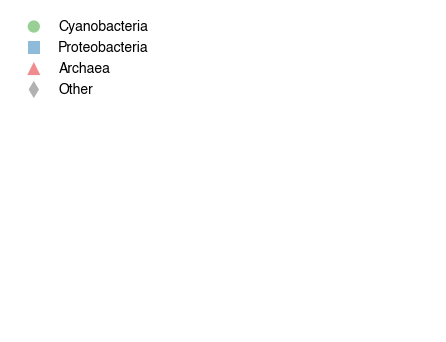

In [11]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

f = plt.figure(figsize=(7.5,5.77))
    
plots = gridspec.GridSpec(2,2,wspace=0.0,hspace=0.0,height_ratios=[0.5,2.5], width_ratios=[2.5,0.5])

def clean_axis(ax):
    """Remove ticks, tick labels, and frame from axis"""
    for sp in ax.spines.values():
        sp.set_visible(False)
        
hfont = {'fontname':'Arial'}

ax1 = f.add_subplot(plots[1,0])

# Remove the tick marks; they are unnecessary with the tick lines we just plotted.  
ax1.tick_params(axis="both", which="both", bottom="off", top="off",  
                labelbottom="off", left="off", right="off", labelleft="off")

clean_axis(ax1)

ax1.scatter([], [],
            color='k', edgecolor='', s=150, alpha=0.3, label='Other', marker='d')
ax1.scatter([], [],
            color='#e31a1c', edgecolor='', s=170, alpha=0.5, label='Archaea', marker='^')
ax1.scatter([], [],
            color='#1f78b4', edgecolor='', s=150, alpha=0.5, label='Proteobacteria', marker='s')
ax1.scatter([], [],
            color='#33a02c', edgecolor='', s=150, alpha=0.5, label='Cyanobacteria', marker='o')

handles, labels = ax1.get_legend_handles_labels()

ax1.legend(handles[::-1], labels[::-1], scatterpoints=1, fontsize=14,
           loc='upper left').draw_frame(False)

f.tight_layout()

#plt.savefig('%s.png' %'Test1_Final_dist_legend', format='png',dpi=600)
plt.show()

---
###Previous###

+ [Data Collection and Processing](1_KaiABC_BLAST_DataCollectionProcessing.ipynb)
+ [Impact of filtering on the number of hits](2_KaiABC_BLAST_BarChart.ipynb)
+ [Distribution of circadian clock protein](3_KaiABC_BLAST_Heatmap.ipynb)

###Next###

+ [Co-occurence of circadian clock proteins in cyanobacteria](5_KaiABC_BLAST_FisherTest.ipynb)

---